In [16]:
import os
import cv2
import json
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
FILE_PATH = os.path.join(os.getcwd(), '../data/5_spins/')
#Check if file exists
MASK_PATH = os.path.join(FILE_PATH,'masks')
if not os.path.exists(MASK_PATH):
    os.makedirs(MASK_PATH)

/home/boomalope/nerf_estimator/src/nerf_estimator/blender/scripts/../data/5_spins/masks/0.png


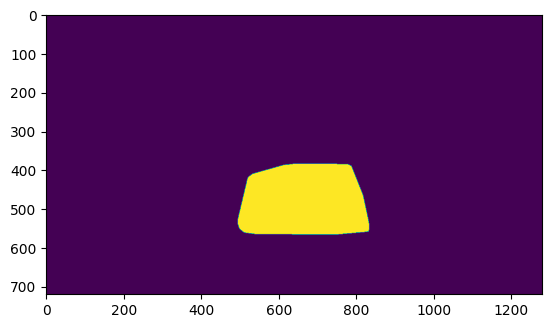

In [18]:
#Open transforms.json
with open(os.path.join(FILE_PATH,'transforms.json')) as f:
    transforms = json.load(f)

new_frames = []

cnt = 0
for f in transforms["frames"]:
    #Get Frame path
    frame_path = os.path.join(FILE_PATH,f["file_path"])
    #Open Frame
    frame = cv2.imread(frame_path)
    #Find edge
    edge = cv2.Canny(frame,100,200)
    edge_points = np.where(edge==255)
    #Get convex hull that contains edge
    hull = cv2.convexHull(np.array([edge_points[1],edge_points[0]]).T)
    #Create mask with hull
    mask = np.zeros((frame.shape[0],frame.shape[1]),dtype=np.uint8)
    cv2.fillConvexPoly(mask,hull,255)
    plt.imshow(mask)

    #Save mask
    mask_path = os.path.join( "masks","{}.png".format(cnt))
    mask_path = os.path.join(FILE_PATH,mask_path)
    print(mask_path)
    cv2.imwrite(mask_path,mask)

    f_copy = f.copy()
    f_copy["mask_path"] = mask_path
    new_frames.append(f_copy)

    cnt += 1
transforms["frames"] = new_frames

with open(os.path.join(FILE_PATH,'transforms.json'), 'w') as outfile:
    json.dump(transforms, outfile, indent=4)